## Instalamos Paquetes y cargamos librerias

In [141]:
#Limpiamos memoria
rm(list=ls());
is.installed <- function(mypkg) {
  is.element(mypkg, installed.packages()[,1]) 
}

#Instalamos paquetes para agrupar csv
if (!is.installed("data.table")){
  install.packages("data.table",repos = "http://cran.us.r-project.org")
};
#Intslamos paquete para manipular ts
if (!is.installed("xts")){
  install.packages("xts",repos = "http://cran.us.r-project.org")
};
#Instalamos paquete para agrupar datos
if (!is.installed("dplyr")){
  install.packages("dplyr",repos = "http://cran.us.r-project.org")
};

# Instalamos paquete para leer exccels
if (!is.installed("readxl")){
  install.packages("readxl",repos = "http://cran.us.r-project.org")
};


In [142]:
# Cargamos las librerias
library(data.table)
library(xts)
library(dplyr)    # loads %>%
library(readxl)
library(ggplot2)

## Cargamos datos calidad del aire 2001-2018 Madrid

In [143]:
#Cargamos los datos de los anos en un dataset (utilziamos read.csv ya que el separador es,)

data2001<- read.csv(file = "data/madrid_2001.csv",header = TRUE);
data2002<- read.csv(file = "data/madrid_2002.csv",header = TRUE);
data2003<- read.csv(file = "data/madrid_2003.csv",header = TRUE);
data2004<- read.csv(file = "data/madrid_2004.csv",header = TRUE);
data2005<- read.csv(file = "data/madrid_2005.csv",header = TRUE);
data2006<- read.csv(file = "data/madrid_2006.csv",header = TRUE);
data2007<- read.csv(file = "data/madrid_2007.csv",header = TRUE);
data2008<- read.csv(file = "data/madrid_2008.csv",header = TRUE);
data2009<- read.csv(file = "data/madrid_2009.csv",header = TRUE);
data2010<- read.csv(file = "data/madrid_2010.csv",header = TRUE);
data2011<- read.csv(file = "data/madrid_2011.csv",header = TRUE);
data2012<- read.csv(file = "data/madrid_2012.csv",header = TRUE);
data2013<- read.csv(file = "data/madrid_2013.csv",header = TRUE);
data2014<- read.csv(file = "data/madrid_2014.csv",header = TRUE);
data2015<- read.csv(file = "data/madrid_2015.csv",header = TRUE);
data2016<- read.csv(file = "data/madrid_2016.csv",header = TRUE);
data2017<- read.csv(file = "data/madrid_2017.csv",header = TRUE);
data2018<- read.csv(file = "data/madrid_2018.csv",header = TRUE);

In [144]:
# unimos los datos 
data <- data.table::rbindlist(list(data2001,data2002,data2003,data2004,data2005,data2006,
                                   data2007,data2008,data2009,data2010,data2011,data2012,
                                   data2013,data2014,data2015,data2016,data2017,data2018),
                                   fill = TRUE);

# convertimos la lista en un dataset
airMadrid <- as.data.frame(data); 

# liberamos memoria
rm(list=ls(pattern="data"))

## Visualizacion inicial datos calidad del aire

In [145]:
# observamos que todos los datos se han unido, aplicando head y tail al dataset 
# para ver cuando empiezan y acaban fechas

head(airMadrid)

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
2001-08-01 01:00:00,NA,"0,37",NA,NA,NA,"58,40","87,15",NA,"34,53","105,00",NA,"6,34",NA,NA,28079001,NA,NA,NA
2001-08-01 01:00:00,"1,50","0,34","1,49","4,10","0,07","56,25","75,17","2,11","42,16","100,60","1,73","8,11","1,24","10,82",28079035,NA,NA,NA
2001-08-01 01:00:00,NA,"0,28",NA,NA,NA,"50,66","61,38",NA,"46,31","100,10",NA,"7,85",NA,NA,28079003,NA,NA,NA
2001-08-01 01:00:00,NA,"0,47",NA,NA,NA,"69,79","73,45",NA,"40,65","69,78",NA,"6,46",NA,NA,28079004,NA,NA,NA
2001-08-01 01:00:00,NA,"0,39",NA,NA,NA,"22,83","24,80",NA,"66,31","75,18",NA,"8,80",NA,NA,28079039,NA,NA,NA
2001-08-01 01:00:00,"2,11","0,63","2,48","5,94","0,05","66,26","118,10","3,15","33,50","122,70","2,29","6,36","1,23","13,28",28079006,NA,NA,NA


In [146]:
tail(airMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,"1,3",NA,"1,2",NA,"0,13",94,190,NA,NA,35,NA,NA,"1,68","5,2",28079055,NA,63,"1,55"
3808220,2018-02-01 00:00:00,NA,"0,5",NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,"0,7",NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


## Carga datos Precipitaciones 2001-2018

In [147]:
#Cargamos los datos de las precipitaciones
rainfall_2001<- readxl::read_xlsx("data/rainfall_2001.xlsx",col_names = TRUE);
rainfall_2002<- readxl::read_xlsx("data/rainfall_2002.xlsx",col_names = TRUE);
rainfall_2003<- readxl::read_xlsx("data/rainfall_2003.xlsx",col_names = TRUE);
rainfall_2004<- readxl::read_xlsx("data/rainfall_2004.xlsx",col_names = TRUE);
rainfall_2005<- readxl::read_xlsx("data/rainfall_2005.xlsx",col_names = TRUE);
rainfall_2006<- readxl::read_xlsx("data/rainfall_2006.xlsx",col_names = TRUE);
rainfall_2007<- readxl::read_xlsx("data/rainfall_2007.xlsx",col_names = TRUE);
rainfall_2008<- readxl::read_xlsx("data/rainfall_2008.xlsx",col_names = TRUE);
rainfall_2009<- readxl::read_xlsx("data/rainfall_2009.xlsx",col_names = TRUE);
rainfall_2010<- readxl::read_xlsx("data/rainfall_2010.xlsx",col_names = TRUE);
rainfall_2011<- readxl::read_xlsx("data/rainfall_2011.xlsx",col_names = TRUE);
rainfall_2012<- readxl::read_xlsx("data/rainfall_2012.xlsx",col_names = TRUE);
rainfall_2013<- readxl::read_xlsx("data/rainfall_2013.xlsx",col_names = TRUE);
rainfall_2014<- readxl::read_xlsx("data/rainfall_2014.xlsx",col_names = TRUE);
rainfall_2015<- readxl::read_xlsx("data/rainfall_2015.xlsx",col_names = TRUE);
rainfall_2016<- readxl::read_xlsx("data/rainfall_2016.xlsx",col_names = TRUE);
rainfall_2017<- readxl::read_xlsx("data/rainfall_2017.xlsx",col_names = TRUE);
rainfall_2018<- readxl::read_xlsx("data/rainfall_2018.xlsx",col_names = TRUE);

In [148]:
# unimos los datos
rainfall <- data.table::rbindlist(list(rainfall_2001,rainfall_2002,rainfall_2003,rainfall_2004,
              rainfall_2005,rainfall_2006,rainfall_2007,rainfall_2008,rainfall_2009,rainfall_2010,
              rainfall_2011,rainfall_2012,rainfall_2013,rainfall_2014,rainfall_2015,rainfall_2016,
rainfall_2017,rainfall_2018), fill = TRUE)

# convertimos la lista en un dataset
datasetRainfall <- as.data.frame(rainfall);

# liberamos memoria
rm(list=ls(pattern="rainfall"))

# cambiamos nombre de las columnas
data.table::setnames(datasetRainfall, "FECHA", "date")
data.table::setnames(datasetRainfall, "Precipitación: l/m2", "l/m2")

## Visualizacion inicial datos precipitaciones

In [149]:
##observamos que todos los datos se han unido, aplicando head y tail al dataset 
# para ver cuando empiezan y acaban fechas
head(datasetRainfall)

date,l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0


In [150]:
tail(datasetRainfall)

,date,l/m2
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


## Limpieza de datos

Primero debemos tranformar los NaN en NA para obtener los datos que puedens ser utilizados

In [151]:
is.nan.data.frame <- function(x)
    do.call(cbind,lapply(x,is.nan))
airMadrid <- as.data.frame(airMadrid)
airMadrid[is.nan(airMadrid)] <- NA
tail(airMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,"1,3",NA,"1,2",NA,"0,13",94,190,NA,NA,35,NA,NA,"1,68","5,2",28079055,NA,63,"1,55"
3808220,2018-02-01 00:00:00,NA,"0,5",NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,"0,7",NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


In [152]:
#Limpieza de datos datasetMadrid

#1) Calculamos el porcenje de NA para descartar aquellas columnas cuyo porcentage sea muy alto
naPerColumn <- colSums(is.na(airMadrid))

#2) Todos los gases tienen al menos un NA por , tanto, estudiamos gases a descartar, para ello
#quitamos los demás parámetros
percentageNA <- round(naPerColumn/nrow(airMadrid) *100, digits = 2)
percentageNA <- percentageNA[percentageNA > 0]
percentageNA <- percentageNA[order(percentageNA)]
percentageNA

NO_2   O_3  PM10  SO_2    CO   NOx    NO   TCH  NMHC   BEN   TOL   EBE  PM25 
 0,56 21,44 24,87 27,11 30,39 37,60 59,76 71,47 71,50 72,65 72,72 73,70 78,56 
  OXY   PXY   MXY   CH4 
91,71 91,71 91,72 99,61

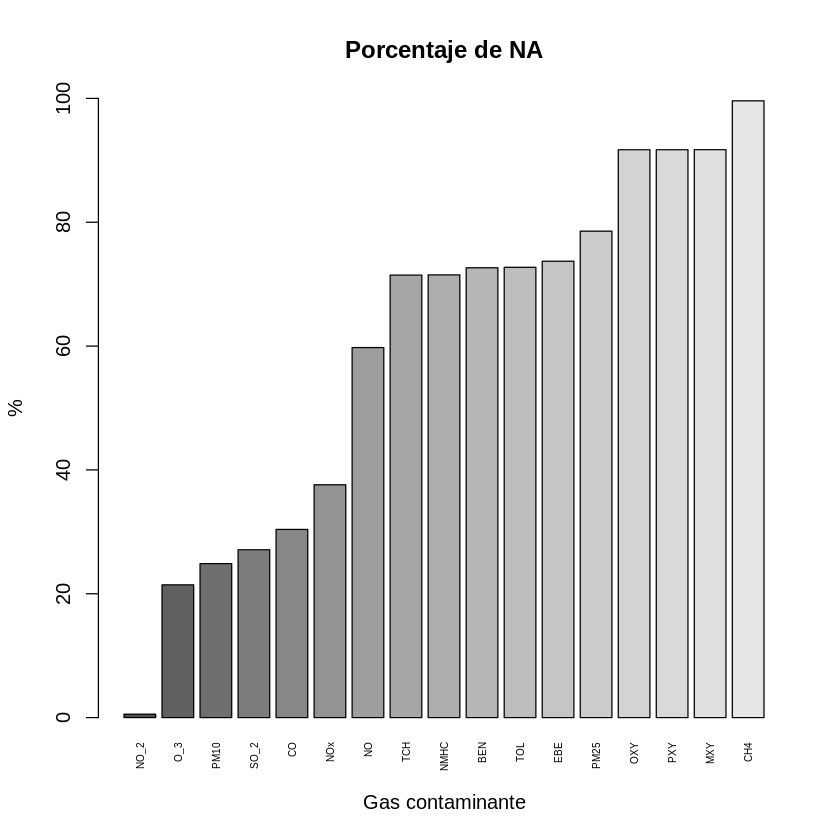

In [153]:
#2)Pintamos grafica de barras para observar volumen NA en los gases contaminantes
barplot(percentageNA, main ="Porcentaje de NA",xlab = "Gas contaminante",ylab = "%",
        ylim = c(0,100), las=3, cex.names=.5, col = gray.colors(17))

In [154]:
#Nos quedamos con aquellos gases que tengan menos del 35% de NA
percentageNA[percentageNA < 35]

NO_2   O_3  PM10  SO_2    CO 
 0,56 21,44 24,87 27,11 30,39

In [155]:
airMadrid#Procedemos a quitar el resto de columnas
airMadrid$BEN = NULL;
airMadrid$EBE = NULL;
airMadrid$MXY = NULL;
airMadrid$NMHC = NULL;
airMadrid$NOx = NULL;
airMadrid$OXY = NULL;
airMadrid$PXY = NULL;
airMadrid$TCH = NULL;
airMadrid$TOL = NULL;
airMadrid$PM25 = NULL;
airMadrid$NO = NULL;
airMadrid$CH4 = NULL;

#Mostramos dataframe para observar cambios
head(airMadrid)
tail(airMadrid)

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
2001-08-01 01:00:00,NA,"0,37",NA,NA,NA,"58,40","87,15",NA,"34,53","105,00",NA,"6,34",NA,NA,28079001,NA,NA,NA
2001-08-01 01:00:00,"1,50","0,34","1,49","4,10","0,07","56,25","75,17","2,11","42,16","100,60","1,73","8,11","1,24","10,82",28079035,NA,NA,NA
2001-08-01 01:00:00,NA,"0,28",NA,NA,NA,"50,66","61,38",NA,"46,31","100,10",NA,"7,85",NA,NA,28079003,NA,NA,NA
2001-08-01 01:00:00,NA,"0,47",NA,NA,NA,"69,79","73,45",NA,"40,65","69,78",NA,"6,46",NA,NA,28079004,NA,NA,NA
2001-08-01 01:00:00,NA,"0,39",NA,NA,NA,"22,83","24,80",NA,"66,31","75,18",NA,"8,80",NA,NA,28079039,NA,NA,NA
2001-08-01 01:00:00,"2,11","0,63","2,48","5,94","0,05","66,26","118,10","3,15","33,50","122,70","2,29","6,36","1,23","13,28",28079006,NA,NA,NA
2001-08-01 01:00:00,NA,"0,28",NA,NA,NA,"35,80","39,59",NA,"68,25","124,90",NA,"5,23",NA,NA,28079007,NA,NA,NA
2001-08-01 01:00:00,NA,"0,67",NA,NA,NA,"74,83","112,00",NA,"26,41","113,00",NA,"11,61",NA,NA,28079009,NA,NA,NA
2001-08-01 01:00:00,NA,"0,41",NA,NA,NA,"33,21","37,30",NA,"62,30","125,30",NA,"10,87",NA,NA,28079038,NA,NA,NA
2001-08-01 01:00:00,NA,"0,17",NA,NA,"0,13","24,13","36,97",NA,"46,20","95,59",NA,"3,89","1,44",NA,28079011,NA,NA,NA


date,CO,NO_2,O_3,PM10,SO_2,station
2001-08-01 01:00:00,"0,37","58,40","34,53","105,00","6,34",28079001
2001-08-01 01:00:00,"0,34","56,25","42,16","100,60","8,11",28079035
2001-08-01 01:00:00,"0,28","50,66","46,31","100,10","7,85",28079003
2001-08-01 01:00:00,"0,47","69,79","40,65","69,78","6,46",28079004
2001-08-01 01:00:00,"0,39","22,83","66,31","75,18","8,80",28079039
2001-08-01 01:00:00,"0,63","66,26","33,50","122,70","6,36",28079006


,date,CO,NO_2,O_3,PM10,SO_2,station
3808219,2018-02-01 00:00:00,NA,94,NA,35,NA,28079055
3808220,2018-02-01 00:00:00,"0,5",91,1,35,NA,28079056
3808221,2018-02-01 00:00:00,"0,7",107,NA,29,15,28079057
3808222,2018-02-01 00:00:00,NA,48,2,NA,NA,28079058
3808223,2018-02-01 00:00:00,NA,103,2,NA,NA,28079059
3808224,2018-02-01 00:00:00,NA,96,3,26,NA,28079060


In [156]:
# Liberamos memoria
rm(percentageNA)
rm(naPerColumn)

## Agrupacion de datos

In [157]:
##Se ordenan los datos por estacion, después se comprimen todas las horas 
##de un dia para cada estacion en un solo dia

airMadrid<- airMadrid[order(airMadrid$station),]
head(airMadrid, n=24)
tail(airMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
1,2001-08-01 01:00:00,"0,37","58,40","34,53","105,00","6,34",28079001
25,2001-08-01 02:00:00,"0,42","65,76","27,93","69,75","7,15",28079001
49,2001-08-01 03:00:00,"0,32","61,09","32,07","56,22","6,26",28079001
73,2001-08-01 04:00:00,"0,23","47,02","42,21","50,69","5,19",28079001
97,2001-08-01 05:00:00,"0,19","47,17","48,46","49,49","5,03",28079001
121,2001-08-01 06:00:00,"0,06","63,83","40,80","43,47","5,24",28079001
145,2001-08-01 07:00:00,"0,28","91,74","22,18","42,19","7,37",28079001
169,2001-08-01 08:00:00,"0,89","127,80","11,98","45,72","11,37",28079001
193,2001-08-01 09:00:00,"1,51","129,50","9,71","68,46","15,57",28079001
217,2001-08-01 10:00:00,"1,80","127,70","8,86","91,84","19,47",28079001


,date,CO,NO_2,O_3,PM10,SO_2,station
2268754,2010-07-31 19:00:00,"0,22","17,83","120,20","20,17","6,93",28079099
2268776,2010-07-31 20:00:00,"0,23","22,57","112,70","13,95","6,88",28079099
2268798,2010-07-31 21:00:00,"0,27","33,91","98,27","22,44","6,84",28079099
2268820,2010-07-31 22:00:00,"0,38","64,05","69,79","52,17","6,97",28079099
2268842,2010-07-31 23:00:00,"0,50","86,81","49,55","54,36","7,12",28079099
2268864,2010-08-01 00:00:00,"0,43","76,33","52,26","47,15","7,03",28079099


### Cambios de formato en la fecha

In [158]:
airMadrid$date <- as.Date(airMadrid$date, format = "%Y-%m-%d")

In [159]:
head(airMadrid, n = 24)
tail(airMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
1,2001-08-01,"0,37","58,40","34,53","105,00","6,34",28079001
25,2001-08-01,"0,42","65,76","27,93","69,75","7,15",28079001
49,2001-08-01,"0,32","61,09","32,07","56,22","6,26",28079001
73,2001-08-01,"0,23","47,02","42,21","50,69","5,19",28079001
97,2001-08-01,"0,19","47,17","48,46","49,49","5,03",28079001
121,2001-08-01,"0,06","63,83","40,80","43,47","5,24",28079001
145,2001-08-01,"0,28","91,74","22,18","42,19","7,37",28079001
169,2001-08-01,"0,89","127,80","11,98","45,72","11,37",28079001
193,2001-08-01,"1,51","129,50","9,71","68,46","15,57",28079001
217,2001-08-01,"1,80","127,70","8,86","91,84","19,47",28079001


,date,CO,NO_2,O_3,PM10,SO_2,station
2268754,2010-07-31,"0,22","17,83","120,20","20,17","6,93",28079099
2268776,2010-07-31,"0,23","22,57","112,70","13,95","6,88",28079099
2268798,2010-07-31,"0,27","33,91","98,27","22,44","6,84",28079099
2268820,2010-07-31,"0,38","64,05","69,79","52,17","6,97",28079099
2268842,2010-07-31,"0,50","86,81","49,55","54,36","7,12",28079099
2268864,2010-08-01,"0,43","76,33","52,26","47,15","7,03",28079099


In [160]:
madrid <- airMadrid %>%
  group_by(station,date) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))
head(madrid)
tail(madrid)
rm(airMadrid)

station,date,CO,NO_2,O_3,PM10,SO_2
28079001,2001-01-02,"1,243333","84,53750","12,576667","36,92455","20,28083"
28079001,2001-01-03,"1,242917","79,75125","10,961250","37,21292","16,23917"
28079001,2001-01-04,"1,134167","75,39250","12,002917","35,03667","16,75125"
28079001,2001-01-05,"1,535833","77,14083","8,755833","34,27625","16,00958"
28079001,2001-01-06,"1,009167","64,47708","13,955417","17,03792","15,35417"
28079001,2001-01-07,"1,016250","67,06125","12,776250","20,45500","18,43042"


station,date,CO,NO_2,O_3,PM10,SO_2
28079099,2010-12-27,"0,6770833","83,11375","7,620417","31,41708","15,32375"
28079099,2010-12-28,"0,7100000","86,31750","7,642500","35,74667","18,47833"
28079099,2010-12-29,"0,7404167","82,27375","9,689583","31,68542","18,05083"
28079099,2010-12-30,"0,6145833","68,60792","7,415417","25,95917","13,35000"
28079099,2010-12-31,"0,4387500","55,20375","14,215417","14,84542","10,28958"
28079099,2011-01-01,"0,4800000","53,53000","6,850000","19,45000","11,71000"


#### Observamos que la estacion `28079099` no tiene muestras desde 2011, se debe a que fue dada de baja ese año por lo que se procede a eliminar del estudio. A continuación mostramos el final del data.frame para observar que ya no se encuentra dicha estación.

In [161]:
madrid <-  madrid[!madrid$station == 28079099,]
tail(madrid)

station,date,CO,NO_2,O_3,PM10,SO_2
28079060,2018-04-26,NaN,"29,041667","77,25000","42,54167",NaN
28079060,2018-04-27,NaN,"20,958333","81,83333","29,57143",NaN
28079060,2018-04-28,NaN,"8,375000","87,20833","10,33333",NaN
28079060,2018-04-29,NaN,"6,958333","93,08333","14,45833",NaN
28079060,2018-04-30,NaN,"13,708333","83,33333","12,91667",NaN
28079060,2018-05-01,NaN,"14,000000","81,00000","6,00000",NaN


In [162]:
datasetRainfall$date <- as.Date(datasetRainfall$date)
rainfall<-datasetRainfall
rm(datasetRainfall)
head(rainfall)

date,l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0


## Discretizamos la calidad del aire
Para ello nos guiraremos de la siguiente tabla, de cada fila se escogerá el mayor de todos los contaminantes y se comparara con la tabla adjunta:

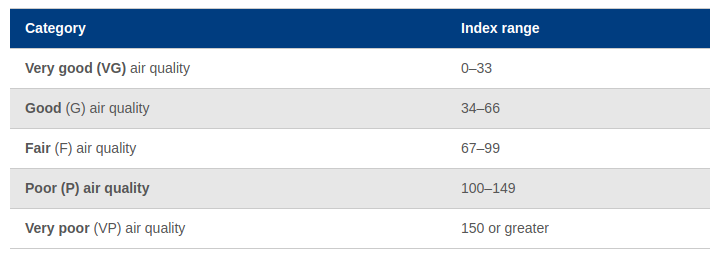

In [167]:
madrid$airIndex =NULL
madrid[, "airIndex"] <- apply(madrid, 1, max("CO",NO_2,O_3,PM10,SO_2))
head(madrid)

ERROR: Error in match.fun(FUN): objeto 'NO_2' no encontrado


## Cruzamos los datos

In [110]:
# Cruzamos los datos de las precipitaciones y la contaminacion por fecha 
data <- merge ( x = madrid, y = rainfall, by = "date",)
head(data[order(data$station),])

,date,station,CO,NO_2,O_3,PM10,SO_2,l/m2
32,2001-01-02,28079001,"1,243333","84,53750","12,576667","36,92455","20,28083",0.1
57,2001-01-03,28079001,"1,242917","79,75125","10,961250","37,21292","16,23917",2.2
80,2001-01-04,28079001,"1,134167","75,39250","12,002917","35,03667","16,75125",2.4
116,2001-01-05,28079001,"1,535833","77,14083","8,755833","34,27625","16,00958",13.3
138,2001-01-06,28079001,"1,009167","64,47708","13,955417","17,03792","15,35417",0.0
168,2001-01-07,28079001,"1,016250","67,06125","12,776250","20,45500","18,43042",0.0


In [139]:
airRainfallts <- ts(data,start = c(2001,1),end = c(2018,5),frequency = 365)

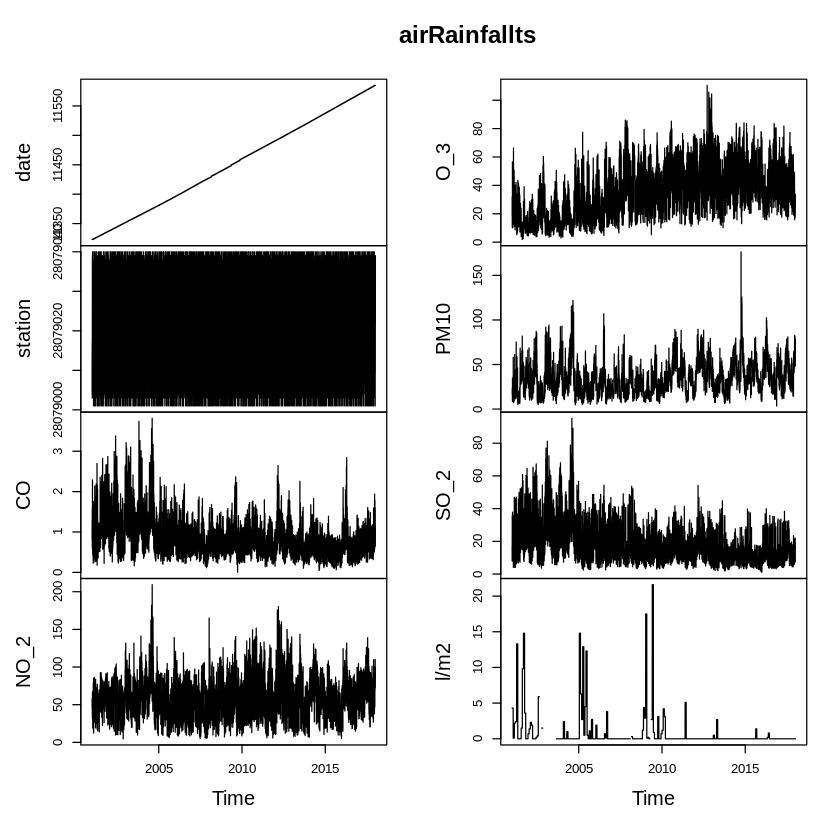

In [140]:
plot(airRainfallts)